# ANALISA STATISTIK DATASET TAGIHAN KESEHATAN/ASURANSI

*Project Probabilitas dan Statistika oleh M Sbastian Rai*

Project ini merupakan bagian dari project siswa kelas Data Analisis Pacmann Academy.

Project ini berusaha melakukan analisis komprehensif dari sebuah dataset mengenai tagihan kesehatan dari US Health Insurance Dataset. Analisis data dibatasi melalui tujuan-tujuan berikut:

Tujuan:
1. Menyajikan analisis statistik deskriptif, seperti rata-rata umur, rata-rata tagihan, varians, dll
2. Menyajikan analisis variabel distrik, seperti proporsi data, peluang perempuan/laki-laki yang merokok, dll
3. Menyajikan analisis variabel kontinu
4. Menyajikan korelasi antar variabel
5. Menguji hipotesis beberapa keadaan


# DATA PREPARATION





In [ ]:
#Mengimpor Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
#Import file
df = pd.read_csv('/content/drive/MyDrive/.DATASET/insurance.csv')

#Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


DATA CLEANSING

In [ ]:
#Mengecek nilai Null
null_value = df.isnull().sum()
print(f'count for null value:\n{null_value}')

count for null value:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
#Mengecek nilai duplikat
duplicated_value = df[df.duplicated()]
duplicated_value

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
#Menghapus nilai duplikat
df.drop_duplicates(keep='first', inplace=True)

#Preview
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
#Mengecek outlier
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


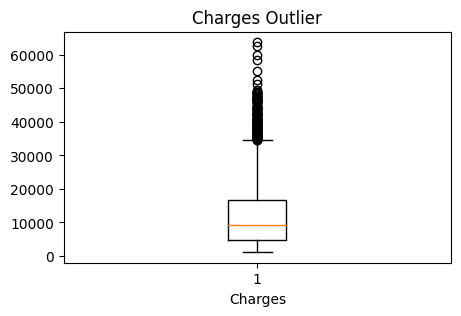

In [ ]:
#Visualisasi outlier kolom 'charges'
plt.figure(figsize = (5,3))
plt.boxplot(df['charges'])
plt.xlabel('Charges')
plt.title('Charges Outlier')
plt.show()

In [ ]:
#Mengecek jumlah outlier kolom 'charges'
q3 = df['charges'].quantile(0.75)
q1 = df['charges'].quantile(0.25)
iqr = q3 - q1
upper_quant = q3 + (1.5*iqr)

count_outlier = len(df[df['charges']> upper_quant])
outlier_prop = round(count_outlier/len(df) *100)
print(f"Jumlah outlier dari kolom charges adalah sebesar {count_outlier} atau {outlier_prop}% dari keseluruhan data")

#Mengecek kaitan outlier charges dnegan kolom smoker
out_charges_smoker = len(df[(df['smoker'] == 'yes') & (df['charges']> upper_quant)])
print(f'Sebanyak {out_charges_smoker} dari {count_outlier} adalah jumlah outlier dari kolom charges yang merupakan smoker')

#Mengecek kaitan outlier charges dengan kolom bmi
out_charges_bmi = len(df[(df['bmi'] > 25) & (df['charges']> upper_quant)])
print(f'Sebanyak {out_charges_bmi} dari {count_outlier} adalah jumlah outlier dari kolom charges yang memiliki bmi di atas 25')

#Membuat keputusan
print('='*100)
print('Outlier dari kolom harga tidak perlu dihapus atau digantikan. \nmengingat memiliki faktor prediktif yang kuat terhadap korelasi dengan variabel lain')

Jumlah outlier dari kolom charges adalah sebesar 139 atau 10% dari keseluruhan data
Sebanyak 136 dari 139 adalah jumlah outlier dari kolom charges yang merupakan smoker
Sebanyak 138 dari 139 adalah jumlah outlier dari kolom charges yang memiliki bmi di atas 25
Outlier dari kolom harga tidak perlu dihapus atau digantikan. 
mengingat memiliki faktor prediktif yang kuat terhadap korelasi dengan variabel lain


# Analisis Statistik Deskriptif

[1] Rata-rata umur peserta asuransi secara general

In [ ]:
avg_age = df['age'].mean()

print(f'Rata-rata umur peserta asuransi adalah {round(avg_age)}')

Rata-rata umur peserta asuransi adalah 39


[2] Rata-rata umur peserta asuransi yang merokok berdasarkan kategori gender

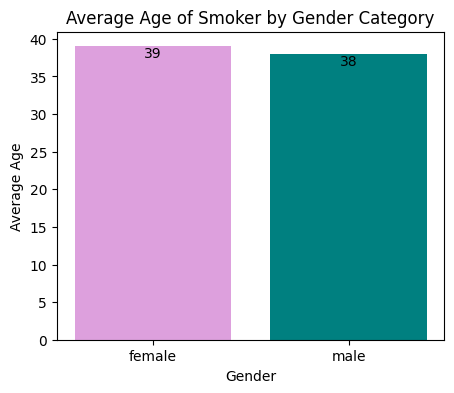

In [ ]:
#Melakukan filter untuk kolom 'smoker'
data_smoker = df[df['smoker']=='yes']

#Mengelompokkan kategori gender dan mencari rata-rata usia
avg_gendered_age = data_smoker.groupby('sex')['age'].mean().round().astype(int)

#Membuat visualisasi perbedaan rata-rata umur berdasarkan gender
plt.figure(figsize=(5, 4))
plt.bar(avg_gendered_age.index, avg_gendered_age.values, color=('plum','teal'))

for i, v in zip(avg_gendered_age.index, avg_gendered_age.values):
    plt.text(i, v, v, ha='center', va='top', fontsize=10)

plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.title('Average Age of Smoker by Gender Category')
plt.show()

In [ ]:
#Versi 2
#Melakukan grouping gender dan status perokok
avg_gendered_age2 = df.groupby(['sex', 'smoker']).agg(avg_age=('age', 'mean'))
avg_gendered_age2 = avg_gendered_age2.round().astype(int)
avg_gendered_age2

avg_age
sex    smoker         
female no           40
       yes          39
male   no           39
       yes          38

[2b] Jumlah Perokok Perempuan dan Laki-Laki

In [ ]:
gendered_smoker = pd.crosstab(df['sex'], df['smoker'], normalize='columns')
gendered_smoker

smoker,no,yes
sex,,
female,0.514581,0.419708
male,0.485419,0.580292


[3] Variansi tagihan perokok dan non perokok

In [ ]:
#Mencari varians tagihan dengan mengelompokkan status perokok
var_charges = df.groupby('smoker').agg(charges_varians=('charges', 'var'))
var_charges = var_charges.round()
var_charges

,charges_varians
smoker,
no,35915735.0
yes,133207311.0


[4] Rata-rata tagihan antara perokok dan non perokok

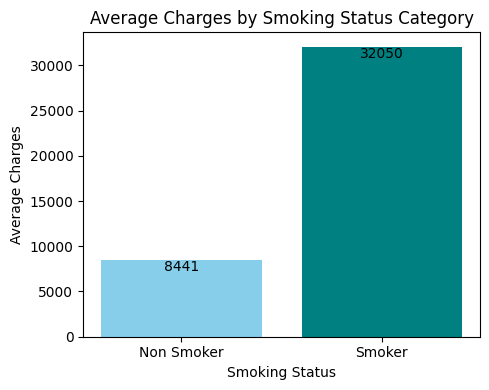

In [ ]:
#Mengelompokkan kategori gender dan mencari rata-rata usia
avg_charges = df.groupby('smoker')['charges'].mean().round().astype(int)

# Membuat visualisasi perbedaan rata-rata umur berdasarkan gender
plt.figure(figsize=(5,4))
plt.bar(['Non Smoker', 'Smoker'], avg_charges.values, color=('skyblue','teal'))

for i, v in zip(['Non Smoker', 'Smoker'], avg_charges.values):
    plt.text(i, v, v, ha='center', va='top', fontsize=10)

plt.xlabel('Smoking Status')
plt.ylabel('Average Charges')
plt.title('Average Charges by Smoking Status Category')
plt.savefig('avg_charges_smoking cat.png')
plt.tight_layout()
plt.show()

[5] Rata-rata tagihan antara perokok dan non perokok yang keduanya memiliki BMI di atas 25

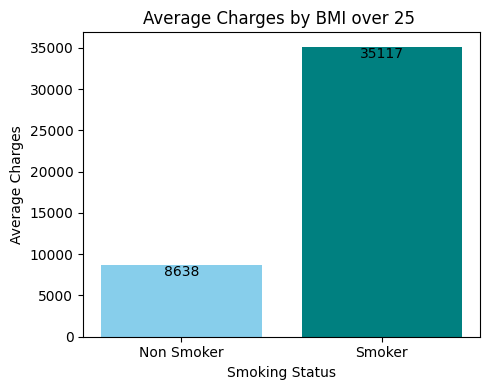

In [ ]:
#Melakukan filter berdasarkan nilai BMI
bmi_over = df[df['bmi'] > 25]

#Melakukan pengelompokan berdasarkan status perokok
avg_charges_bmi = bmi_over.groupby('smoker')['charges'].mean().round().astype(int)

#Membuat visualisasi
plt.figure(figsize=(5,4))
plt.bar(['Non Smoker', 'Smoker'], avg_charges_bmi.values, color=('skyblue', 'teal'))

for i, v in zip(['Non Smoker', 'Smoker'], avg_charges_bmi.values):
    plt.text(i, v, v, ha='center', va='top', fontsize=10)

plt.xlabel('Smoking Status')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI over 25 ')
plt.savefig('avg_charges_smoking_bmi.png')
plt.tight_layout()
plt.show()

In [ ]:
#Versi 2
bmi_over = df[df['bmi'] > 25]

avg_charges_bmi = bmi_over.groupby('smoker').agg(avg_charges =('charges', 'mean'))
avg_charges_bmi = avg_charges_bmi.round().astype(int)
avg_charges_bmi

,avg_charges
smoker,
no,8638
yes,35117


# Analisis Variabel Diskrit

[1] Gender dengan tagihan tertinggi

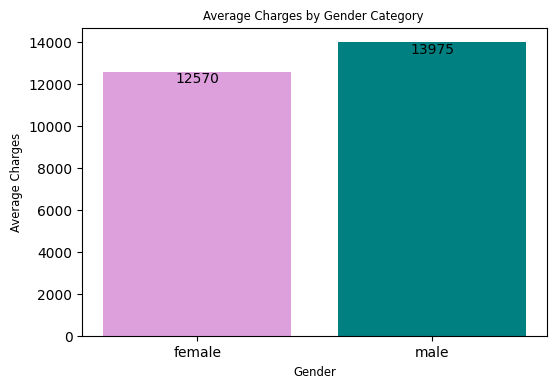

In [ ]:
#Mengelompokkan data
avg_gendered_charges = df.groupby('sex')['charges'].mean().round().astype(int)

#Membuat visualisasi
plt.figure(figsize=(6,4))
plt.bar(avg_gendered_charges.index, avg_gendered_charges.values, color=('plum','teal'))

for i, v in zip(avg_gendered_charges.index, avg_gendered_charges.values):
    plt.text(i, v, v, ha='center', va='top', fontsize=10)

plt.xlabel('Gender', fontsize='small')
plt.ylabel('Average Charges', fontsize='small')
plt.title('Average Charges by Gender Category ', fontsize='small')
plt.savefig('avg_chrg_gender.png')
plt.show()

[2] Proporsi data berdasarkan region

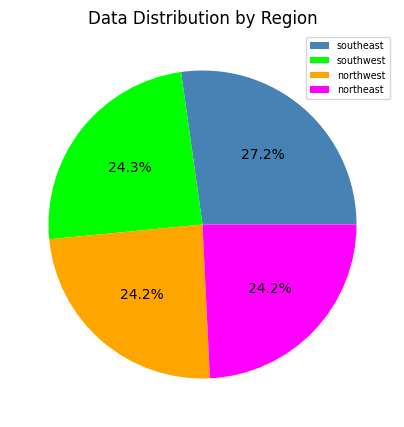

In [ ]:
#Menghitung proporsi
region_counts = df['region'].value_counts(normalize=True)

#Membuat visualisasi
plt.figure(figsize=(5,5))
plt.pie(region_counts, autopct='%.1f%%', colors= ("steelblue", "lime", "orange", "magenta"))
plt.title('Data Distribution by Region')
plt.legend(labels=region_counts.index,fontsize='x-small')
plt.savefig('dist_reg.png')
plt.show()

[3] Proporsi Perokok dan Non Perokok

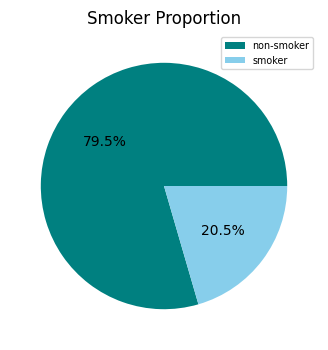

In [ ]:
#Menghitung proporsi
smoker_counts = df['smoker'].value_counts(normalize=True)

#Membuat visualisasi
plt.figure(figsize=(4,4))
plt.pie(smoker_counts, autopct='%.1f%%', colors= ("teal", "skyblue"))
plt.title('Smoker Proportion')
plt.legend(labels=("non-smoker", "smoker"),fontsize='x-small')
plt.savefig('smoker prop.png')
plt.show()

[4] Peluang seorang adalah perempuan diketahui sebagai perokok, atau: P(Perempuan | Perokok)

In [ ]:
#Menghitung peluang:
#P(Perempuan | Perokok)= n(Perempuan Perokok)/n(Perokok)

#Menghitung jumlah (n) perempuan yang merokok
fsmoker = len(df[(df['smoker']=='yes') & (df['sex']=='female')])

#Menghitung jumlah seluruh perokok
smoker = len(df[df['smoker'] == 'yes'])

prob_fsmoker = fsmoker/smoker
print(f'Peluang seseorang adalah perempuan diketahui adalah perokok, sebesar {round(prob_fsmoker, 3)}')

Peluang seseorang adalah perempuan diketahui adalah perokok, sebesar 0.42


In [ ]:
#Versi 2
fsmoker2 = df[(df['smoker']=='yes')]['sex'].value_counts(normalize=True)['female']

print(f'Peluang seseorang adalah perempuan diketahui adalah perokok, sebesar {round(fsmoker2, 3)}')

Peluang seseorang adalah perempuan diketahui adalah perokok, sebesar 0.42


[5] Peluang seseorang adalah laki-laki diketahui sebagai perokok, atau: P(Laki-laki|Perokok)

In [ ]:
msmoker = df[(df['smoker']=='yes')]['sex'].value_counts(normalize=True)['male']

print(f'Peluang seseorang adalah laki-laki diketahui adalah perokok, sebesar {round(msmoker, 3)}')

Peluang seseorang adalah laki-laki diketahui adalah perokok, sebesar 0.58


[6] Distribusi peluang besar tagihan per region

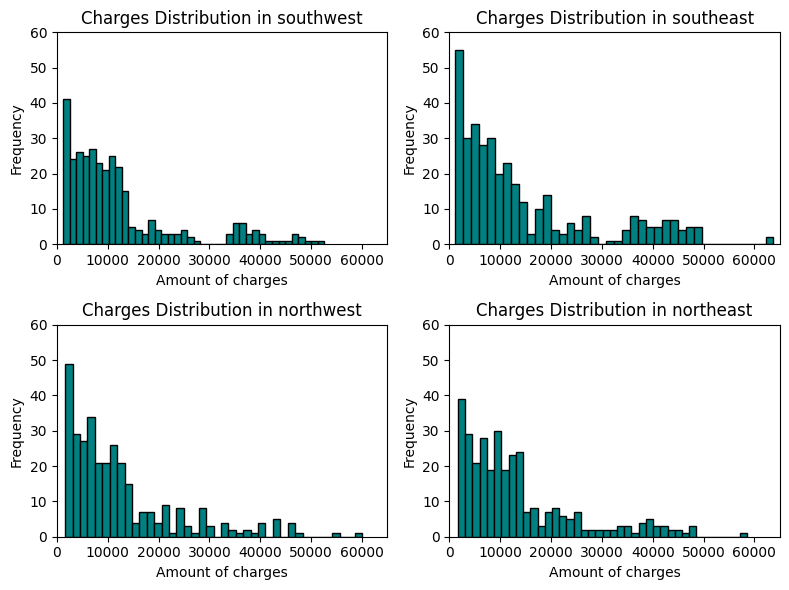

In [ ]:
df_regions = df['region'].unique()

fig, axs = plt.subplots(2, 2, figsize=(8, 6))

for i, region in enumerate(df_regions):
    row = i // 2
    col = i % 2

    axs[row, col].hist(df[df['region'] == region]['charges'],
                       bins=40,
                       color='teal',
                       edgecolor='black')
    axs[row, col].set_xlabel('Amount of charges')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Charges Distribution in {region}')
    axs[row, col].set_xlim([0, 65000])
    axs[row, col].set_ylim([0, 60])

plt.tight_layout()
plt.savefig('subplot dist reg.png')
plt.show()

In [ ]:
#Detail distribusi tagihan per regional berdasarkan nilai mean, median, dan std
#Menampilkan pivot table
pivot_region_charges = df.pivot_table(values='charges',
                        index=['region'],
                        aggfunc = ['mean', 'median', 'std'])

pivot_region_charges.round()

,mean,median,std
,charges,charges,charges
region,,,
northeast,13406.0,10058.0,11256.0
northwest,12451.0,8977.0,11073.0
southeast,14735.0,9294.0,13971.0
southwest,12347.0,8799.0,11557.0


# Analisis Variabel Kontinu

[1] Peluang kejadian:
1.   Seseorang dengan BMI >25 mendapat tagihan di atas 16.7k
2.   Seseorang dengan BMI <=25 mendapat tagihan di atas 16.7k



In [ ]:
#Peluang kejadian 1 (Seseorang dengan BMI >25 mendapat tagihan di atas 16.7k)
#Menghitung peluang: n(bmi>25 & charges>15000)/n(data)
prob_event1 = round(len(df[(df['bmi']>25) & (df['charges']>16700)]) / len(df), 3)

#Peluang kejadian 2 (Seseorang dengan BMI >25 mendapat tagihan di atas 16.7k)
#Menghitung peluang: n(bmi>25 & charges>15000)/n(data)
prob_event2 = round(len(df[(df['bmi']<=25) & (df['charges']>16700)]) / len(df), 3)

print(f'Peluang kejadian 1 adalah {prob_event1} \nPeluang kejadian 2 adalah {prob_event2}')

if prob_event1 > prob_event2:
  print('Seseorang dengan BMI di atas 25 memiliki kemungkinan yang lebih besar memiliki tagihan kesehatan di atas $16.700 dibandingkan dengan seseorang dengan BMI di bawah 25')
else:
  print('Seseorang dengan BMI di atas 25 memiliki kemungkinan tidak lebih besar memiliki tagihan kesehatan di atas $16.700 dibandingkan dengan seseorang dengan BMI di bawah 25')



Peluang kejadian 1 adalah 0.212 
Peluang kejadian 2 adalah 0.038
Seseorang dengan BMI di atas 25 memiliki kemungkinan yang lebih besar memiliki tagihan kesehatan di atas $16.700 dibandingkan dengan seseorang dengan BMI di bawah 25


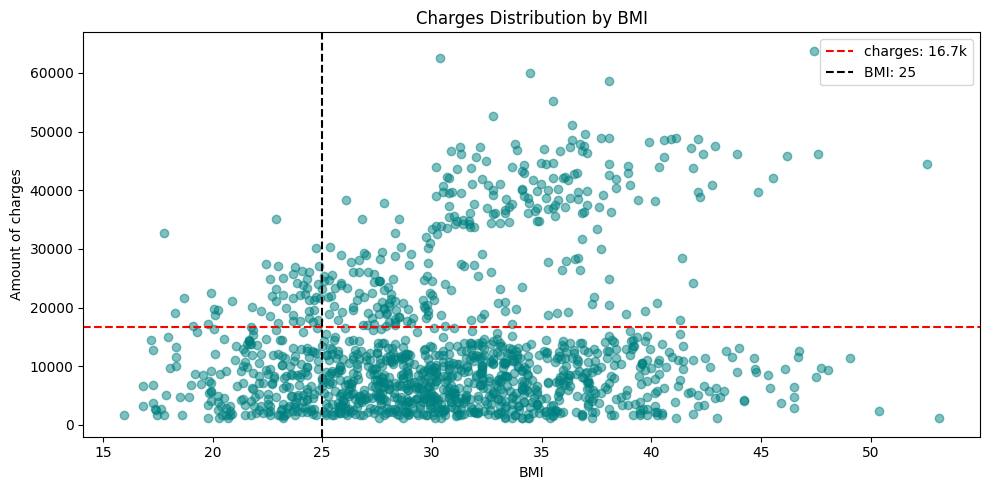

In [ ]:
#Membuat visualisasi scatterplot
plt.figure(figsize=(10, 5))
plt.scatter(df['bmi'],
            df['charges'],
            color='teal',
            alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Amount of charges')
plt.title('Charges Distribution by BMI')
plt.axhline(y=16700, color='r', linestyle='--', label='charges: 16.7k')
plt.axvline(x=25, color='k', linestyle='--', label='BMI: 25')
plt.legend()
plt.tight_layout()
plt.savefig('chrg_dsit_scat.png')
plt.show()

[2] Peluang kejadian:
1.   Seseorang perokok dengan BMI di atas 25 mendapat tagihan lebih dari 16.7k
2.   Seseorang non perokok dengan BMI di atas 25 mendapat tagihan lebih dari 16.7K



In [ ]:
#Peluang kejadian 1 (Seseorang perokok dengan BMI >25 mendapat tagihan di atas 15k)
prob_event1b = round(len(df[(df['smoker'] == 'yes') & (df['bmi']>25) & (df['charges']>16700)]) / len(df), 3)

#Peluang kejadian 2 (Seseorang non perokok dengan BMI >25 mendapat tagihan di atas 15k)
prob_event2b = round(len(df[(df['smoker'] == 'no') & (df['bmi'] >25) & (df['charges']>16700)]) / len(df), 3)

print(f'Peluang kejadian 1 adalah {prob_event1b} \nPeluang kejadian 2 adalah {prob_event2b}')

if prob_event1 > prob_event2:
  print('Seseorang perokok dengan BMI di atas 25 memiliki kemungkinan yang lebih besar memiliki tagihan kesehatan di atas $16.700 dibandingkan dengan non perokok')
else:
  print('Seseorang dengan BMI di atas 25 memiliki kemungkinan tidak lebih besar memiliki tagihan kesehatan di atas $16.700 dibandingkan dengan non perokok')


Peluang kejadian 1 adalah 0.161 
Peluang kejadian 2 adalah 0.051
Seseorang perokok dengan BMI di atas 25 memiliki kemungkinan yang lebih besar memiliki tagihan kesehatan di atas $16.700 dibandingkan dengan non perokok


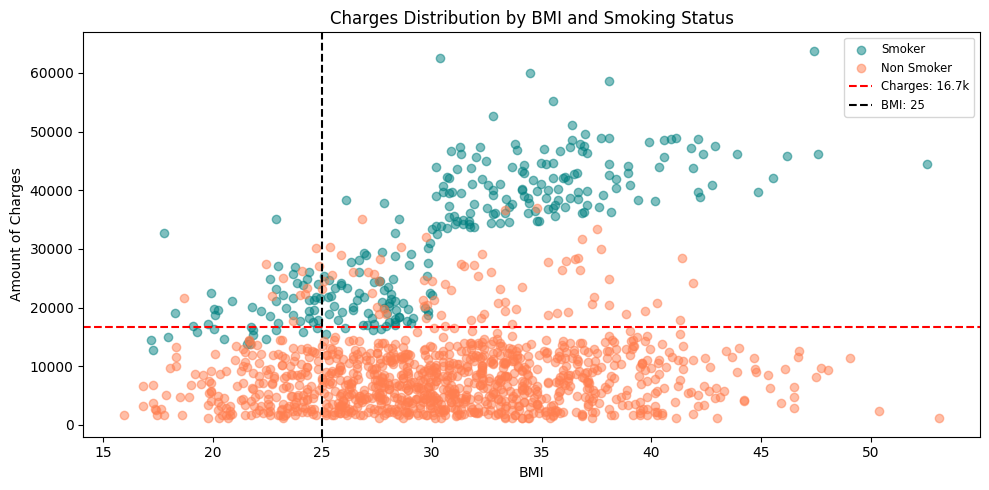

In [ ]:
# Visualisasi distribusi tagihan berdasarkan BMI dan status perokok
plt.figure(figsize=(10, 5))
plt.scatter(df[df['smoker'] == 'yes']['bmi'],
            df[df['smoker'] == 'yes']['charges'],
            color='teal',
            alpha=0.5,
            label='Smoker')
plt.scatter(df[df['smoker'] == 'no']['bmi'],
            df[df['smoker'] == 'no']['charges'],
            color='coral',
            alpha=0.5,
            label='Non Smoker')
plt.xlabel('BMI')
plt.ylabel('Amount of Charges')
plt.title('Charges Distribution by BMI and Smoking Status')
plt.axhline(y=16700, color='r', linestyle='--', label='Charges: 16.7k')
plt.axvline(x=25, color='k', linestyle='--', label='BMI: 25')
plt.legend(fontsize='small')
plt.tight_layout()
plt.savefig('chrg_dist_smok_bmi.png')
plt.show()

# Analisis Korelasi Variabel

[1] Menghitung korelasi variabel Charges dengan variabel numerik lainnya (Age, BMI, Children)

In [ ]:
var_corr = df[['charges', 'age', 'children', 'bmi']].corr()

var_corr

,charges,age,children,bmi
charges,1.000000,0.298308,0.067389,0.198401
age,0.298308,1.000000,0.041536,0.109344
children,0.067389,0.041536,1.000000,0.012755
bmi,0.198401,0.109344,0.012755,1.000000


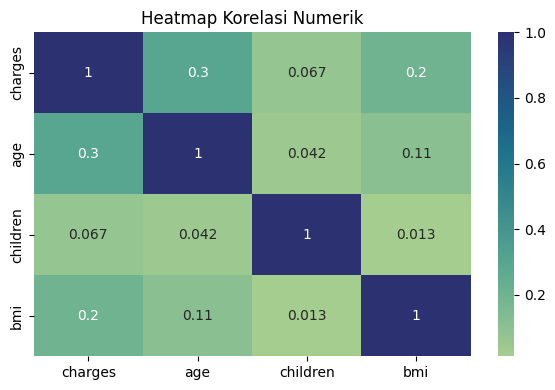

In [ ]:
#Membuat visualisasi korelasi variabel dalam bentuk heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(var_corr, annot=True, cmap='crest')
plt.title('Heatmap Korelasi Numerik')
plt.tight_layout()
plt.savefig('heatmap cor.png')
plt.show()

[2] Menghitung korelasi variabel Charges dengan variabel katgeori: Sex, Region, Smoker

In [ ]:
#Melakukan uji anova
var_cat = ['sex', 'region', 'smoker']
anova_test = {}

for i in var_cat:
    group_cat = df.groupby(i)['charges'].apply(list)
    f_statistic, p_value = stats.f_oneway(*group_cat)
    anova_test[i] = p_value

#Hasil Anove test
for j, p_value in anova_test.items():
    print(j, ":", p_value)

sex : 0.033820791995078286
region : 0.03276288025444947
smoker : 1.4067220949358597e-282


# Pengujian Hipotesis

[1] Tagihan kesehatan bagi perokok lebih besar dari tagihan kesehatan non perokok

In [ ]:
from scipy.stats import t

In [ ]:
#Membagi data dalam dua proporsi
smoker_charges = df[df['smoker'] == 'yes']['charges']
nonsmoker_charges = df[df['smoker'] == 'no']['charges']

#Hipotesis
  #Ho: Tagihan kesehatan perokok lebih kecil dari tagihan kesehatan non perokok
  #Ha: Tagihan kesehatan perokok lebih besar dari tagihan kesehatan non perokok

#Menentukan tingkat signifikansi dan menghitung nilai kritis T
sig = 0.05
t_crit = t.ppf(sig, len(df)-1)

print(f'Nilai signifikansi alpha yang ditetapkan adalah {sig}')
print(f'Nilai kritis T adalah {t_crit}')
print('_'*50)

#Melakukan statistik uji
t_stat, p_value = stats.ttest_ind(smoker_charges, nonsmoker_charges, alternative='greater')
print(f"Statistik Uji untuk T-Test: {t_stat}")
print(f"Statistik uji untuk nilai P-value: {p_value}")
print('_'*50)

#Membuat keputusan
if (t_stat > t_crit) & (p_value < sig):
  print('Hipotesis 0 ditolak karena nilai t-test lebih besar daripada nilai t-kritis, dan p-value lebih kecil dari sig. alpha')
  print('Terdapat perbedaan yang signifikan secara statistik antara tagihan perokok dan tagihan non perokok dengan tagihan perokok lebih besar')
else:
  print('Hipotesis 0 diterima. Tagihan perokok tidak lebih besar dari tagihan non perokok')

Nilai signifikansi alpha yang ditetapkan adalah 0.05
Nilai kritis T adalah -1.6459949688112583
__________________________________________________
Statistik Uji untuk T-Test: 46.64479459840305
Statistik uji untuk nilai P-value: 7.033610474688249e-283
__________________________________________________
Hipotesis 0 ditolak karena nilai t-test lebih besar daripada nilai t-kritis, dan p-value lebih kecil dari sig. alpha
Terdapat perbedaan yang signifikan secara statistik antara tagihan perokok dan tagihan non perokok dengan tagihan perokok lebih besar


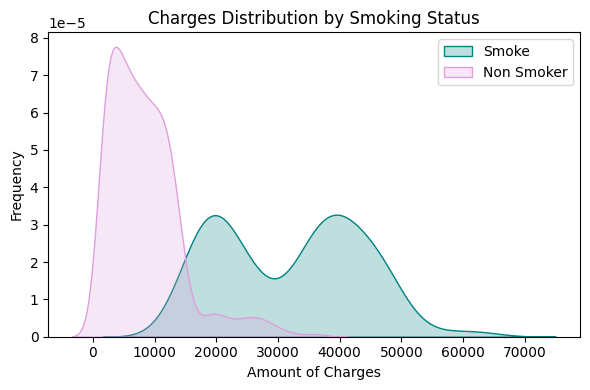

In [ ]:
# Visualisasi perbedaan distribusi antara tagihan kesehatan perokok dan non perokok
plt.figure(figsize=(6, 4))
sns.kdeplot(smoker_charges, fill=True, color='teal', label='Smoke')
sns.kdeplot(nonsmoker_charges, fill=True, color='plum', label='Non Smoker')
plt.xlabel('Amount of Charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution by Smoking Status')
plt.legend()
plt.tight_layout()
plt.savefig('chg_dist_smok.png')
plt.show()

[2] Variansi tagihan kesehatan perokok dan non perokok

In [ ]:
from scipy.stats import f

In [ ]:
#Membagi data dalam dua proporsi
smoker_charges = df[df['smoker'] == 'yes']['charges']
nonsmoker_charges = df[df['smoker'] == 'no']['charges']

#Hipotesis
  #Ho: Varians tagihan kesehatan perokok dan non perokok sama
  #Ha: Varians tagihan kesehatan perokok dan non peorkok tidak sama

#Menentukan tingkat signifikansi dan menghitung nilai kritis F
sig = 0.05
f_crit = f.ppf(sig, len(smoker_charges)-1, len(nonsmoker_charges)-1)

print(f'Nilai signifikansi alpha yang ditetapkan adalah {sig}')
print(f'Nilai kritis F adalah {f_crit}')
print('_'*50)

#Melakukan statistik uji
f_stat, p_value = stats.levene(smoker_charges, nonsmoker_charges)
print(f"Statistik Uji untuk F-Test: {f_stat}")
print(f"Statistik uji untuk nilai P-value: {p_value}")
print('_'*50)

#Membuat keputusan
if (f_stat > f_crit) & (p_value < sig):
  print('Hipotesis 0 ditolak karena nilai F-tes lebih besar daripada nilai f-kritis, dan p-value lebih kecil dari sig. alpha')
  print('varians dari tagihan kesehatan perokok tidak sama dengan varian tagihan kesehatan non perokok')
else:
  print('Hipotesis 0 diterima. Varians tagihan perokok sama dengan tagihan non perokok')

Nilai signifikansi alpha yang ditetapkan adalah 0.05
Nilai kritis F adalah 0.8501468324374596
__________________________________________________
Statistik Uji untuk F-Test: 332.47137394800666
Statistik uji untuk nilai P-value: 1.670117565125241e-66
__________________________________________________
Hipotesis 0 ditolak karena nilai F-tes lebih besar daripada nilai f-kritis, dan p-value lebih kecil dari sig. alpha
varians dari tagihan kesehatan perokok tidak sama dengan varian tagihan kesehatan non perokok


[3] Proporsi Perokok laki-laki lebih besar dari perempuan

In [ ]:
#Membuat crosstab
crosst = pd.crosstab(df['smoker'], df['sex'])
crosst
#Hipotesis
  #H0: Proporsi perokok laki-laki lebih kecil dari proporsi perokok perempuan
  #Ha: Propoeri perokok laki-laki lebih besar dari proporsi perokok perempuan

sex,female,male
smoker,,
no,547,516
yes,115,159


In [ ]:
#Menghitung chi-square critical value
sig = 0.05
df = 1 #(rows of crosstab - 1)*(columns of crosstab - 1)
chi_crit = stats.chi2.ppf(sig, df=1)

print(f'Nilai signifikansi alpha yang ditetapkan adalah {sig}')
print(f'Nilai kritis chi-square adalah {chi_crit}')
print('_'*50)

#Menghitung uji chi-square
chi_stat, p_value, dof, expected = stats.chi2_contingency(crosst)
print(f"Statistik uji untuk Chi-Square: {chi_stat}")
print(f"Statistik uji untuk p-value: {p_value}")
print('_'*50)

#Membuat keputusan
if (chi_stat > chi_crit) & (p_value < sig):
  print('Hipotesis 0 ditolak karena nilai chi-tes lebih besar daripada nilai chi-kritis, dan p-value lebih kecil dari sig. alpha')
  print('Proporsi perokok laki-laki lebih besar dari proporsi perokok perempuan')
else:
  print('Hipotesis 0 diterima. Proporsi perokok laki-laki lebih kecil dari proporsi perokok perempuan')

Nilai signifikansi alpha yang ditetapkan adalah 0.05
Nilai kritis chi-square adalah 0.003932140000019522
__________________________________________________
Statistik uji untuk Chi-Square: 7.469139330086637
Statistik uji untuk p-value: 0.0062765550120107375
__________________________________________________
Hipotesis 0 ditolak karena nilai chi-tes lebih besar daripada nilai chi-kritis, dan p-value lebih kecil dari sig. alpha
Proporsi perokok laki-laki lebih besar dari proporsi perokok perempuan


<Figure size 600x400 with 0 Axes>

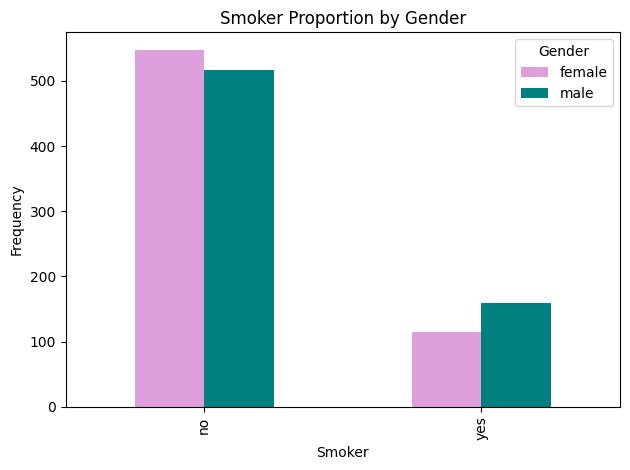

In [ ]:
# Visualisasi proporsi perokok berdasarkan gender
plt.figure(figsize=(6, 4))
crosst.plot(kind='bar', color=('plum','teal'))
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.title('Smoker Proportion by Gender')
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('smok_gen.png')
plt.show()

In [ ]:
|